## Image Alteration Detection using Custom CNN

#### Import libraries

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#### Defining required parameters

In [ ]:
# Parameters
IMG_SIZE = (128, 128)  # Smaller input for faster training
BATCH_SIZE = 16
EPOCHS = 10

# Paths
train_dir = '../dataset/train'
test_dir = '../dataset/test_mixed'

#### Preparing data

In [4]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           class_mode='binary',
                                           subset='training')

val_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         class_mode='binary',
                                         subset='validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


#### Define Custom CNN Model

In [5]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

#### Training model

In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras.src.trainers.data_adapters.py_dataset_adapter")

history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=EPOCHS) 

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step - accuracy: 0.5041 - loss: 0.7159 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.5508 - loss: 0.6920 - val_accuracy: 0.5525 - val_loss: 0.6841
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.5710 - loss: 0.6788 - val_accuracy: 0.6150 - val_loss: 0.6601
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 225ms/step - accuracy: 0.6237 - loss: 0.6472 - val_accuracy: 0.6125 - val_loss: 0.6439
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.6751 - loss: 0.6095 - val_accuracy: 0.6350 - val_loss: 0.6444
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.7047 - loss: 0.5677 - val_accuracy: 0.6525 - val_loss: 0.6474
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.7761 - loss: 0.4776 - val_accuracy: 0.6325 - val_loss: 0.6362
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.8021 - loss: 0

#### Plot Training Curves

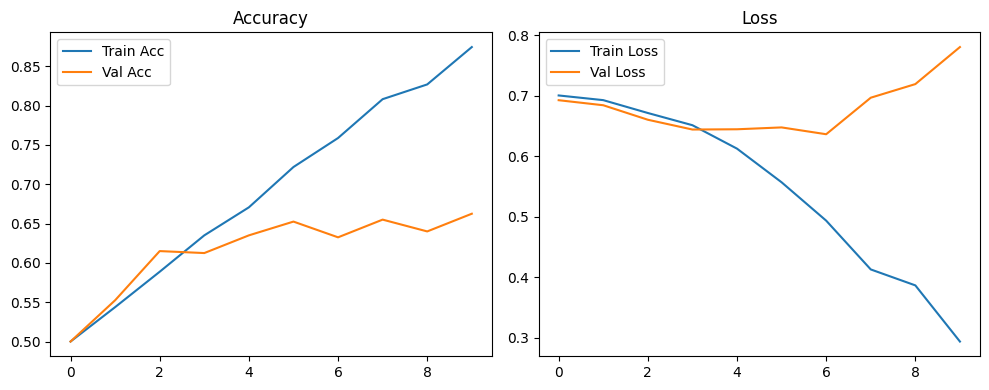

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()

#### Predicting model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


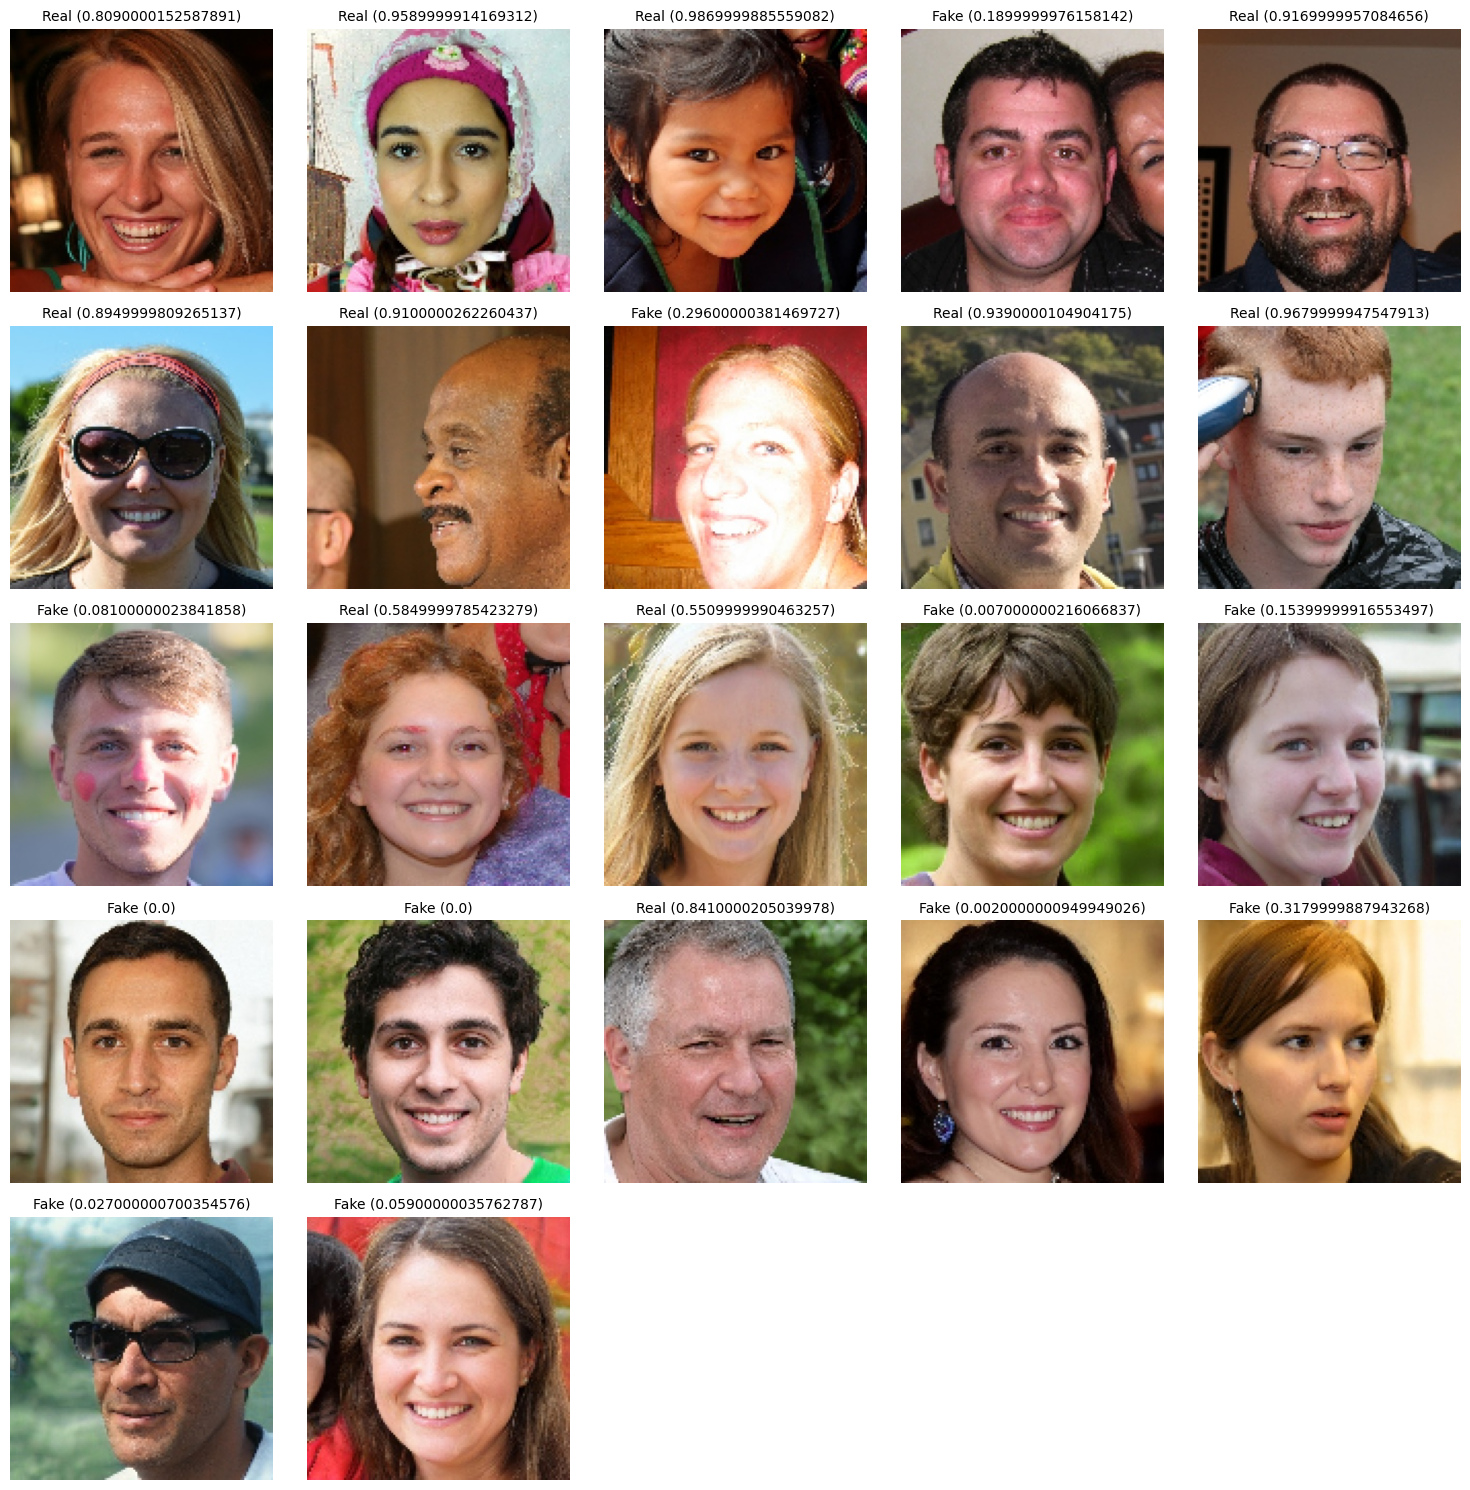

In [10]:
test_images = sorted(os.listdir(test_dir))  # Optional: sorted for consistent output

results = []

plt.figure(figsize=(15, 15))

for i, img_name in enumerate(test_images[:25]):  # Show first 25 predictions
    img_path = os.path.join(test_dir, img_name)
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)[0][0]
    label = "Real" if pred >= 0.5 else "Fake"
    confidence = round(pred, 3)

    results.append({"filename": img_name, "prediction": label, "confidence": confidence})
    # Plot
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{label} ({confidence})", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Showing the result

In [12]:
def predict_mixed_folder(test_dir):
    results = []
    for fname in os.listdir(test_dir):
        path = os.path.join(test_dir, fname)
        img = load_img(path, target_size=IMG_SIZE)
        arr = img_to_array(img) / 255.0
        arr = np.expand_dims(arr, axis=0)
        prob = model.predict(arr)[0][0]
        label = 'Real' if prob > 0.5 else 'Fake'
        results.append((fname, label, prob))
    return results
    
# Run and show results
results = predict_mixed_folder(test_dir)
for fname, label, prob in results:
    print(f"{fname}: {label} ({prob:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
00001.jpg: Real (0.81)
00004.jpg: Real (0.96)
00007.jpg: Real (0.99)
00016.jpg: Fake (0.19)
00023.jpg: Real (0.92)
00025.jpg: Real (0.89)
00028.jpg: Real (0.91)
00